<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computational Physics
###Lecture 18
Neural Networks and Image Processing

In [2]:
pip install mnist

In [3]:
import numpy as np
import mnist
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import os
import pickle
import matplotlib.pyplot as plt

In [4]:
from keras import layers
import keras

In [5]:
#You need to mount google drive to your Colab session.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 check your path is correct


In [6]:
ls gdrive/MyDrive/Colab\ Notebooks

 2D_Ising.ipynb                             CP_Lecture5-solutions.ipynb
'Computational Physics'/                    CP_Lecture6b.ipynb
'Copy of 2021ComputeFest-NotebookToCloud'   CP_Lecture6.ipynb
'Copy of 2D_Ising.ipynb'                   'CP_Lecture6 solution.ipynb'
'Copy of HW 1.ipynb'                        CP_Lecture_7.ipynb
'Copy of Intro_to_coding.ipynb'             CP_Lecture8b.ipynb
 CP_Lecture10.ipynb                         CP_Lecture8.ipynb
 CP_Lecture11.ipynb                         CP_Lecture9.ipynb
 CP_Lecture12.ipynb                         CP_Lecture9_v2.ipynb
 CP_Lecture13.ipynb                        'HW 1.ipynb'
'CP_Lecture 14.ipynb'                       Intro_to_python.ipynb
 CP_Lecture15b.ipynb                        magneticmoment_Ef_data.csv
 CP_Lecture15.ipynb                         mnist.pkl
 CP_Lecture16b.ipynb                       'nCr calculator'
 CP_Lecture16.ipynb                        'oldof CP_Lecture9.ipynb'
'CP Lecture 17.ipynb'                   

Run the cells below for download_mnist() at the start of the lecture. Will take some time to load.

In [8]:
# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
def download_mnist():
  train_images = mnist.train_images()
  train_labels = mnist.train_labels()
  test_images = mnist.test_images()
  test_labels = mnist.test_labels()
  return train_images, train_labels, test_images, test_labels


In [9]:
download = False
mypath = "gdrive/MyDrive/Colab Notebooks/mnist.pkl"
if download:
  train_images, train_labels, test_images, test_labels = download_mnist()
  mnist_data = [train_images, train_labels, test_images, test_labels]
  with open(mypath, 'wb') as f:
    pickle.dump(mnist_data, f)
else:
  with open(mypath, 'rb') as f:
    mnist_data = pickle.load(f)
  x_train, y_train, x_test, y_test = mnist_data

In [10]:
print(x_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,)

(60000, 28, 28)
(60000,)


Display for first ten entries in train_images 

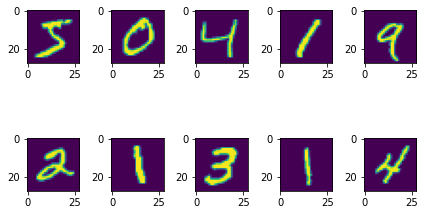

In [11]:
for i in np.arange(10): 
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])
plt.tight_layout()
plt.show()

## Process the image data:

In [12]:
# Normalize the images.
x_train = (x_train / 255) 
x_test = (x_test / 255) 

In [13]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Create a autoencoder model:

In [14]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [15]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [16]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [27]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# autoencoder.compile(optimizer='adam', loss='mean_squared_error')


## Model fit:

In [ ]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [20]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [26]:
encoded_imgs.shape

(10000, 32)

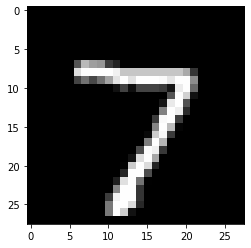

In [39]:
plt.imshow(x_test[0,:].reshape((28,28)))
plt.show()

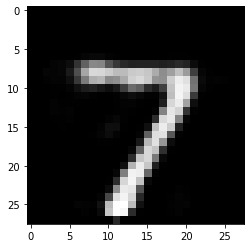

In [40]:
plt.imshow(decoded_imgs[0,:].reshape((28,28)))
plt.show()

In [22]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

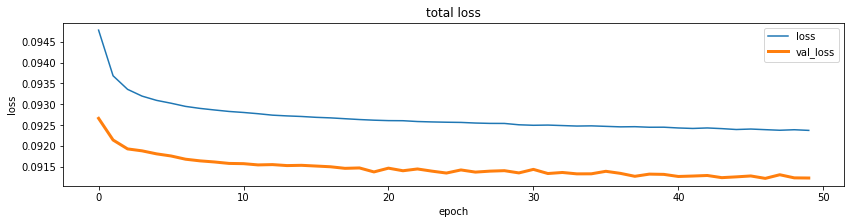

In [38]:
f, ax = plt.subplots(1, 1)
f.set_figwidth(14)
f.set_figheight(3)
ax.plot(history.history['loss'],label='loss')
ax.plot(history.history['val_loss'],label='val_loss',linewidth=3)
ax.set_title('total loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(loc='best')
plt.show()

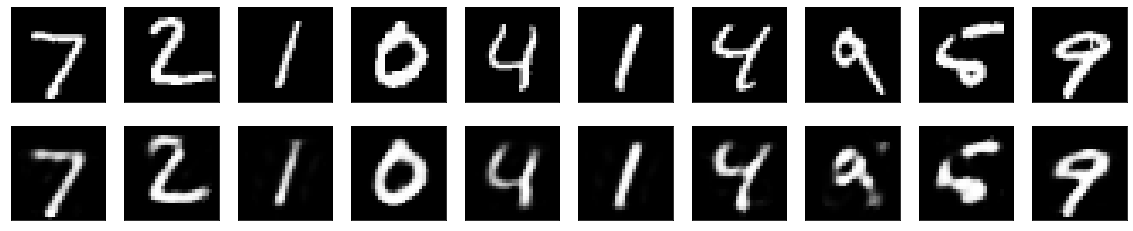

In [24]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## QUESTIONS:
- Visualize the embedding space, Do similar digits cluster? 
- Try using GPUs is there a speedup?
- Experiment with model fitting parameters: batch size, number of epochs
- Experiment with the architecture then check the results. Is there improvement?
  - Add two extra hidden layers (one before and one after the embedding layer).
  - Vary the number of hidden units in your embedding space.
- Visualize the embedding space for different architectures.
  - what is the dimensionaliy of your embedding space?